In [1]:
import os
import zipfile
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

local_zip = '/content/drive/MyDrive/imagedb_btsd.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()
train_dir = '/content/imagedb_btsd/imagedb'
test_dir = '/content/imagedb_btsd/imagedb_test'

In [2]:
train_images = ImageDataGenerator(rescale=1./255,validation_split = 0.25)
test_img = ImageDataGenerator(rescale=1./255)
train_gen = train_images.flow_from_directory(train_dir,
                                              batch_size = 500,
                                              shuffle = 'true',
                                              class_mode = 'categorical',
                                              target_size = (100,100),
                                              subset = 'training',
                                              seed = 1
                                              )
validation_generator =  train_images.flow_from_directory(train_dir,
                                                        batch_size=350,
                                                        class_mode='categorical',
                                                         target_size=(100,100),
                                                        subset='validation',
                                                         seed = 1
                                                         ) 
test_gen = test_img.flow_from_directory(test_dir,
                                              batch_size = 1000,
                                              shuffle = 'true',
                                              class_mode = 'categorical',
                                              target_size = (100,100))

Found 2309 images belonging to 34 classes.
Found 747 images belonging to 34 classes.
Found 2149 images belonging to 34 classes.


In [3]:
#Pre-Trained
from keras.applications import Xception
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
xception_model = Xception(weights='imagenet', 
                 include_top=False, 
                 input_shape=(100, 100, 3))


model.add(xception_model)
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dropout(rate = 0.4))
model.add(layers.Flatten())
model.add(layers.Dropout(rate = 0.3))
model.add(layers.Dense(34, activation='softmax'))
 
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 3, 3, 2048)        20861480  
_________________________________________________________________
dense (Dense)                (None, 3, 3, 32)          65568     
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 288)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 34)                9826      
Total params: 20,936,874
Trainable params: 20,882,346
Non-trainable params: 54,528
_______________________________________

In [4]:
callback = []

save_best_callback = tf.keras.callbacks.ModelCheckpoint(f'best_weights.hdf5', save_best_only=True, verbose=1)
callback.append(save_best_callback)

early_stop_callback = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights=True, verbose=1)
callback.append(early_stop_callback)

# Train the model
train = model.fit(train_gen,
                steps_per_epoch = train_gen.samples / train_gen.batch_size,
                epochs = 20, 
                validation_data = validation_generator,
                validation_steps = validation_generator.samples/validation_generator.batch_size,
                verbose = 1,
                callbacks = callback)

Epoch 1/20
4/4 [==============================] - 23s 3s/step - loss: 3.3524 - acc: 0.1319 - val_loss: 3.4507 - val_acc: 0.3467

Epoch 00001: val_loss improved from inf to 3.45072, saving model to best_weights.hdf5
Epoch 2/20
4/4 [==============================] - 8s 2s/step - loss: 2.0059 - acc: 0.5221 - val_loss: 2.3367 - val_acc: 0.5408

Epoch 00002: val_loss improved from 3.45072 to 2.33673, saving model to best_weights.hdf5
Epoch 3/20
4/4 [==============================] - 8s 2s/step - loss: 0.9764 - acc: 0.7256 - val_loss: 1.5797 - val_acc: 0.6734

Epoch 00003: val_loss improved from 2.33673 to 1.57974, saving model to best_weights.hdf5
Epoch 4/20
4/4 [==============================] - 8s 2s/step - loss: 0.5072 - acc: 0.8613 - val_loss: 0.9918 - val_acc: 0.8139

Epoch 00004: val_loss improved from 1.57974 to 0.99180, saving model to best_weights.hdf5
Epoch 5/20
4/4 [==============================] - 8s 2s/step - loss: 0.2659 - acc: 0.9215 - val_loss: 0.7783 - val_acc: 0.8594

Epo

3/3 [==============================] - 5s 739ms/step - loss: 0.9180 - acc: 0.9432


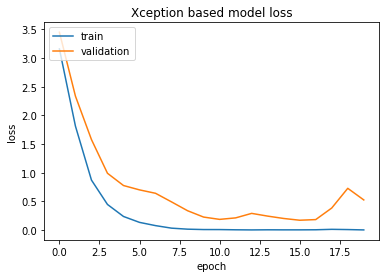

In [5]:
loss, acc = model.evaluate(test_gen)
plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('Xception based model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [9]:
from keras.applications import InceptionResNetV2
from keras import models
from keras import layers
from keras import optimizers
model1 = models.Sequential()
#Load the InceptionResNetV2 model
Inception_model = InceptionResNetV2(weights='imagenet', 
                 include_top=False, 
                 input_shape=(100, 100, 3))

model1.add(Inception_model)
 

model1.add(layers.Dropout(rate = 0.4))
model1.add(layers.Flatten())
model1.add(layers.Dropout(rate = 0.3))
model1.add(layers.Dense(34, activation='softmax'))
 

model1.summary()
model1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(),
              metrics=['acc'])


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 1, 1, 1536)        54336736  
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 1536)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1536)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1536)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 34)                52258     
Total params: 54,388,994
Trainable params: 54,328,450
Non-trainable params: 60,544
_________________________________________________________________


In [10]:
callback1 = []

save_best_callback1 = tf.keras.callbacks.ModelCheckpoint(f'best_weights_1.hdf5', save_best_only=True, verbose=1)
callback1.append(save_best_callback1)

early_stop_callback1 = tf.keras.callbacks.EarlyStopping(patience = 10, restore_best_weights=True, verbose=1)
callback1.append(early_stop_callback1)

# Train the model
train1 = model1.fit(train_gen,
                steps_per_epoch = train_gen.samples/train_gen.batch_size,
                epochs = 20, 
                validation_data=validation_generator,
                validation_steps=validation_generator.samples/validation_generator.batch_size,
                verbose = 1,
                callbacks = callback1)

Epoch 1/20
4/4 [==============================] - 23s 2s/step - loss: 2.8065 - acc: 0.3571 - val_loss: 4.8535 - val_acc: 0.5797

Epoch 00001: val_loss improved from inf to 4.85347, saving model to best_weights_1.hdf5
Epoch 2/20
4/4 [==============================] - 6s 1s/step - loss: 0.3849 - acc: 0.8971 - val_loss: 3.6423 - val_acc: 0.4378

Epoch 00002: val_loss improved from 4.85347 to 3.64230, saving model to best_weights_1.hdf5
Epoch 3/20
4/4 [==============================] - 6s 1s/step - loss: 0.0990 - acc: 0.9718 - val_loss: 3.4757 - val_acc: 0.2597

Epoch 00003: val_loss improved from 3.64230 to 3.47570, saving model to best_weights_1.hdf5
Epoch 4/20
4/4 [==============================] - 6s 1s/step - loss: 0.0334 - acc: 0.9915 - val_loss: 4.5133 - val_acc: 0.1847

Epoch 00004: val_loss did not improve from 3.47570
Epoch 5/20
4/4 [==============================] - 6s 1s/step - loss: 0.0246 - acc: 0.9951 - val_loss: 16.7876 - val_acc: 0.0562

Epoch 00005: val_loss did not impro

3/3 [==============================] - 2s 346ms/step - loss: 0.0984 - acc: 0.9749


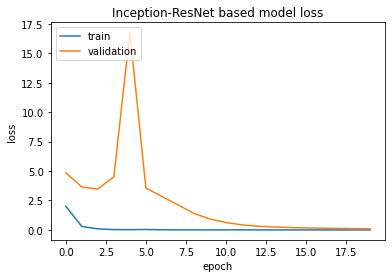

In [11]:
loss1, acc1 = model1.evaluate(test_gen)
plt.plot(train1.history['loss'])
plt.plot(train1.history['val_loss'])
plt.title('Inception-ResNet based model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()